# Initialisation du projet

In [1]:
import pandas as pd
import pandera.pandas as pa

A = pd.read_excel('PCOS_data_without_infertility.xlsx',sheet_name='Full_new', header=0, index_col=0)
A

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,28,44.6,152.000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,36,30,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
2,0,36,65.0,161.500,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,38,32,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
3,1,33,68.8,165.000,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,40,36,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
4,0,37,65.0,148.000,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,42,36,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
5,0,25,52.0,161.000,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,37,30,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,0,35,50.0,164.592,17,72,16,11.00,2,5,8.0,0,1,1.99,1.99,10.06,1.81,28,26,1.11,1.70,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7
538,0,30,63.2,158.000,15,72,18,10.80,2,5,4.0,1,1,80.13,1.99,5.07,2.84,34,32,2.05,5.60,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2
539,0,36,54.0,152.000,13,74,20,10.80,2,6,8.0,0,0,1.99,1.99,11.96,2.78,30,28,2.87,3.70,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3


In [2]:
# Identifier les colonnes problématiques
for col in A.columns:
    print(f"{col}: {A[col].dtype}")

PCOS (Y/N): int64
 Age (yrs): int64
Weight (Kg): float64
Height(Cm) : float64
Blood Group: int64
Pulse rate(bpm) : int64
RR (breaths/min): int64
Hb(g/dl): float64
Cycle(R/I): int64
Cycle length(days): int64
Marraige Status (Yrs): float64
Pregnant(Y/N): int64
No. of aborptions: int64
  I   beta-HCG(mIU/mL): float64
II    beta-HCG(mIU/mL): float64
FSH(mIU/mL): float64
LH(mIU/mL): float64
Hip(inch): int64
Waist(inch): int64
TSH (mIU/L): float64
AMH(ng/mL): float64
PRL(ng/mL): float64
Vit D3 (ng/mL): float64
PRG(ng/mL): float64
RBS(mg/dl): float64
Weight gain(Y/N): int64
hair growth(Y/N): int64
Skin darkening (Y/N): int64
Hair loss(Y/N): int64
Pimples(Y/N): int64
Fast food (Y/N): float64
Reg.Exercise(Y/N): int64
BP _Systolic (mmHg): int64
BP _Diastolic (mmHg): int64
Follicle No. (L): int64
Follicle No. (R): int64
Avg. F size (L) (mm): float64
Avg. F size (R) (mm): float64
Endometrium (mm): float64


In [3]:
#Lignes actives
A_numeric = A.apply(pd.to_numeric, errors='coerce')
LigA = A_numeric.loc[A_numeric.index]
LigA

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,28,44.6,152.000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,36,30,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
2,0,36,65.0,161.500,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,38,32,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
3,1,33,68.8,165.000,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,40,36,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
4,0,37,65.0,148.000,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,42,36,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
5,0,25,52.0,161.000,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,37,30,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,0,35,50.0,164.592,17,72,16,11.00,2,5,8.0,0,1,1.99,1.99,10.06,1.81,28,26,1.11,1.70,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7
538,0,30,63.2,158.000,15,72,18,10.80,2,5,4.0,1,1,80.13,1.99,5.07,2.84,34,32,2.05,5.60,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2
539,0,36,54.0,152.000,13,74,20,10.80,2,6,8.0,0,0,1.99,1.99,11.96,2.78,30,28,2.87,3.70,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3


In [4]:
print("Valeurs manquantes par colonne :")
print(LigA.isnull().sum())

Valeurs manquantes par colonne :
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)      0
Follicle No. (L

In [5]:
#Ajout des valeurs manquantes
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
ligA_preprocessed = LigA.copy()
ligA_preprocessed[['AMH(ng/mL)','Marraige Status (Yrs)']] = imputer_mean.fit_transform(LigA[['AMH(ng/mL)','Marraige Status (Yrs)']])

imputer_fix = SimpleImputer(strategy='constant', fill_value=0.5)
ligA_preprocessed[['Fast food (Y/N)']]=imputer_fix.fit_transform(LigA[['Fast food (Y/N)']])


In [6]:
print("Valeurs manquantes par colonne :")
print(ligA_preprocessed.isnull().sum())

Valeurs manquantes par colonne :
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)      0
Follicle No. (L

In [7]:
# Profil ligne - proportion de lignes calculées à partir des dénombrements du tableau
pl = ligA_preprocessed.divide(ligA_preprocessed.sum(axis=1), axis=0)
pl


,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.033145,0.052795,0.179931,0.017756,0.092333,0.026043,0.012406,0.002368,0.005919,0.008286,0.000000,0.000000,0.002356,0.002356,0.009411,0.004356,0.042615,0.035513,0.000805,0.002450,0.053458,0.020242,0.000675,0.108905,0.000000,0.000000,0.000000,0.000000,0.000000,0.001184,0.0,0.130213,0.094700,0.003551,0.003551,0.021308,0.021308,0.010062
2,0.000000,0.037793,0.068237,0.169543,0.015747,0.077685,0.020996,0.012283,0.002100,0.005249,0.011548,0.001050,0.000000,0.063828,0.002089,0.007065,0.001144,0.039893,0.033594,0.003317,0.001606,0.021091,0.064353,0.001018,0.096582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.125976,0.073486,0.003149,0.005249,0.015747,0.014697,0.003884
3,0.000526,0.017351,0.036174,0.086754,0.005784,0.037856,0.009464,0.006204,0.001052,0.002629,0.005258,0.000526,0.000000,0.259778,0.259778,0.002913,0.000463,0.021031,0.018928,0.001335,0.003486,0.005531,0.026131,0.000189,0.044166,0.000000,0.000000,0.000000,0.000526,0.000526,0.000526,0.0,0.063094,0.042063,0.006835,0.007887,0.009464,0.010516,0.005258
4,0.000000,0.042765,0.075128,0.171061,0.015026,0.083219,0.023116,0.013870,0.002312,0.005779,0.004623,0.000000,0.000000,0.002300,0.002300,0.009316,0.002728,0.048544,0.041609,0.018967,0.001410,0.042650,0.038604,0.000416,0.087842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.138698,0.080907,0.002312,0.002312,0.017337,0.016181,0.008669
5,0.000000,0.010238,0.021295,0.065933,0.004505,0.029485,0.007371,0.004095,0.000819,0.002048,0.000410,0.000410,0.000000,0.328210,0.328210,0.001630,0.000369,0.015152,0.012286,0.001462,0.000926,0.012322,0.017937,0.000156,0.034400,0.000000,0.000000,0.000000,0.000410,0.000000,0.000000,0.0,0.049142,0.032762,0.001229,0.001638,0.006552,0.005733,0.002867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,0.000000,0.043554,0.062220,0.204818,0.021155,0.089597,0.019910,0.013688,0.002489,0.006222,0.009955,0.000000,0.001244,0.002476,0.002476,0.012519,0.002252,0.034843,0.032354,0.001381,0.002115,0.006595,0.045545,0.000311,0.114485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.136884,0.087108,0.001244,0.000000,0.021777,0.012444,0.008337
538,0.000000,0.031975,0.067362,0.168404,0.015988,0.076741,0.019185,0.011511,0.002132,0.005329,0.004263,0.001066,0.001066,0.085406,0.002121,0.005404,0.003027,0.036239,0.034107,0.002185,0.005969,0.022479,0.024515,0.000266,0.115112,0.001066,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.117243,0.074609,0.009593,0.007461,0.020251,0.019185,0.008740
539,0.000000,0.040199,0.060298,0.169728,0.014516,0.082631,0.022333,0.012060,0.002233,0.006700,0.008933,0.000000,0.000000,0.002222,0.002222,0.013355,0.003104,0.033499,0.031266,0.003205,0.004132,0.107655,0.025124,0.000279,0.102730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.122830,0.089331,0.001117,0.000000,0.020099,0.010050,0.008151


In [8]:
# profil marginal des pages
import numpy as np
ligA_preprocessed.sum(axis=0)/np.sum(ligA_preprocessed.values)


PCOS (Y/N)                0.000181
 Age (yrs)                0.017402
Weight (Kg)               0.033019
Height(Cm)                0.086641
Blood Group               0.007642
Pulse rate(bpm)           0.040555
RR (breaths/min)          0.010655
Hb(g/dl)                  0.006179
Cycle(R/I)                0.001417
Cycle length(days)        0.002736
Marraige Status (Yrs)     0.004253
Pregnant(Y/N)             0.000211
No. of aborptions         0.000160
  I   beta-HCG(mIU/mL)    0.367941
II    beta-HCG(mIU/mL)    0.131902
FSH(mIU/mL)               0.008085
LH(mIU/mL)                0.003582
Hip(inch)                 0.021035
Waist(inch)               0.018737
TSH (mIU/L)               0.001651
AMH(ng/mL)                0.003114
PRL(ng/mL)                0.013466
Vit D3 (ng/mL)            0.027637
PRG(ng/mL)                0.000338
RBS(mg/dl)                0.055276
Weight gain(Y/N)          0.000209
hair growth(Y/N)          0.000151
Skin darkening (Y/N)      0.000170
Hair loss(Y/N)      

In [9]:
#Profil colonne
pc = ligA_preprocessed.divide(ligA_preprocessed.sum(axis=0), axis=1)
pc

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.001647,0.001382,0.001795,0.002009,0.001968,0.002113,0.001736,0.001444,0.001871,0.001685,0.000000,0.00000,0.000006,0.000015,0.001006,0.001051,0.001751,0.001639,0.000422,0.000680,0.003432,0.000633,0.001725,0.001703,0.000000,0.000000,0.000000,0.000000,0.000000,0.003591,0.0,0.001773,0.001922,0.000905,0.000835,0.002215,0.002153,0.001854
2,0.00000,0.002117,0.002015,0.001908,0.002009,0.001867,0.001921,0.001938,0.001444,0.001871,0.002647,0.004854,0.00000,0.000169,0.000015,0.000852,0.000311,0.001849,0.001748,0.001959,0.000503,0.001527,0.002270,0.002935,0.001703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001934,0.001682,0.000905,0.001392,0.001846,0.001675,0.000807
3,0.00565,0.001941,0.002132,0.001949,0.001473,0.001817,0.001729,0.001954,0.001444,0.001871,0.002407,0.004854,0.00000,0.001374,0.003834,0.000701,0.000251,0.001946,0.001966,0.001575,0.002179,0.000800,0.001840,0.001089,0.001555,0.000000,0.000000,0.000000,0.004082,0.003774,0.003591,0.0,0.001934,0.001922,0.003920,0.004175,0.002215,0.002393,0.002181
4,0.00000,0.002176,0.002015,0.001748,0.001741,0.001817,0.001921,0.001988,0.001444,0.001871,0.000963,0.000000,0.00000,0.000006,0.000015,0.001020,0.000674,0.002043,0.001966,0.010174,0.000401,0.002804,0.001237,0.001089,0.001407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001934,0.001682,0.000603,0.000557,0.001846,0.001675,0.001636
5,0.00000,0.001470,0.001612,0.001902,0.001473,0.001817,0.001729,0.001656,0.001444,0.001871,0.000241,0.004854,0.00000,0.002229,0.006218,0.000504,0.000257,0.001800,0.001639,0.002213,0.000743,0.002287,0.001622,0.001150,0.001555,0.000000,0.000000,0.000000,0.004082,0.000000,0.000000,0.0,0.001934,0.001922,0.000905,0.001113,0.001969,0.001675,0.001527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,0.00000,0.002058,0.001550,0.001944,0.002277,0.001817,0.001537,0.001822,0.001444,0.001871,0.001925,0.000000,0.00641,0.000006,0.000015,0.001273,0.000517,0.001362,0.001420,0.000688,0.000559,0.000403,0.001355,0.000756,0.001703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001773,0.001682,0.000302,0.000000,0.002154,0.001196,0.001461
538,0.00000,0.001764,0.001959,0.001866,0.002009,0.001817,0.001729,0.001789,0.001444,0.001871,0.000963,0.004854,0.00641,0.000223,0.000015,0.000642,0.000811,0.001654,0.001748,0.001271,0.001840,0.001603,0.000852,0.000756,0.002000,0.004902,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001773,0.001682,0.002714,0.001948,0.002339,0.002153,0.001788
539,0.00000,0.002117,0.001674,0.001795,0.001741,0.001867,0.001921,0.001789,0.001444,0.002245,0.001925,0.000000,0.00000,0.000006,0.000015,0.001514,0.000794,0.001460,0.001529,0.001779,0.001216,0.007327,0.000833,0.000756,0.001703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001773,0.001922,0.000302,0.000000,0.002215,0.001077,0.001592


In [10]:
#profil marginal du scoring par patient
ligA_preprocessed.sum(axis=1)/np.sum(ligA_preprocessed.values)

Sl. No
1      0.000865
2      0.000975
3      0.001946
4      0.000885
5      0.002499
         ...   
537    0.000822
538    0.000960
539    0.000917
540    0.001164
541    0.000963
Length: 541, dtype: float64

# AFC

In [11]:
#Importer les classes de calcul
from fanalysis.ca import CA

#instanciation et entraînement
afc = CA(row_labels=ligA_preprocessed.index,col_labels=ligA_preprocessed.columns, stats=True)
afc.fit(ligA_preprocessed.values)

#valeur propres // pourcentage d'inertie et pourcentage cumulé
afc.eig_

array([[6.37770535e-01, 4.17091388e-01, 3.66855466e-01, 3.46513110e-01,
        2.32180478e-01, 1.34285950e-02, 9.10477759e-03, 6.94267550e-03,
        4.86241440e-03, 4.26937466e-03, 2.79087733e-03, 2.70642143e-03,
        1.99725313e-03, 1.38592997e-03, 1.02475453e-03, 9.02504298e-04,
        7.05073924e-04, 6.02336530e-04, 5.69122151e-04, 5.12373472e-04,
        4.91270253e-04, 4.77703044e-04, 4.19243717e-04, 3.70141381e-04,
        3.62273515e-04, 3.55758503e-04, 3.42530591e-04, 3.07237279e-04,
        2.97513356e-04, 2.80502288e-04, 2.62800180e-04, 2.39898595e-04,
        2.06989795e-04, 2.01331356e-04, 1.73988514e-04, 1.08876310e-04,
        5.79696519e-05, 3.98719358e-05],
       [3.10017020e+01, 2.02746007e+01, 1.78326580e+01, 1.68438264e+01,
        1.12861752e+01, 6.52757186e-01, 4.42578617e-01, 3.37479932e-01,
        2.36359496e-01, 2.07532135e-01, 1.35663131e-01, 1.31557772e-01,
        9.70854609e-02, 6.73693522e-02, 4.98127973e-02, 4.38702758e-02,
        3.42732856e-02,

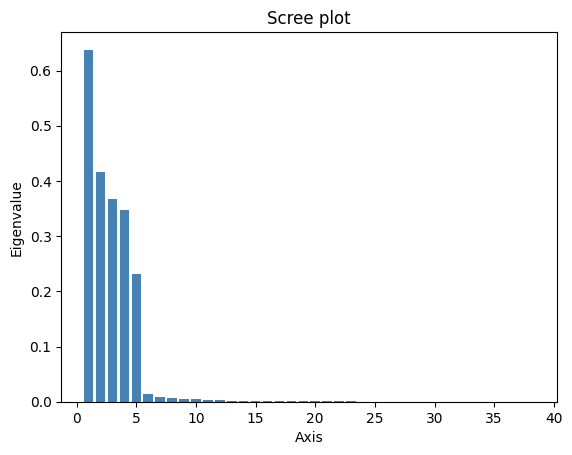

In [12]:
#valeurs propres 
afc.plot_eigenvalues()

In [13]:
#Récupération des informations - calcul des facteurs
info_lig = afc.row_topandas()
info_lig.columns

Index(['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
       'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7', 'row_coord_dim8',
       'row_coord_dim9', 'row_coord_dim10',
       ...
       'row_cos2_dim29', 'row_cos2_dim30', 'row_cos2_dim31', 'row_cos2_dim32',
       'row_cos2_dim33', 'row_cos2_dim34', 'row_cos2_dim35', 'row_cos2_dim36',
       'row_cos2_dim37', 'row_cos2_dim38'],
      dtype='object', length=114)

# Analyse des modalités lignes

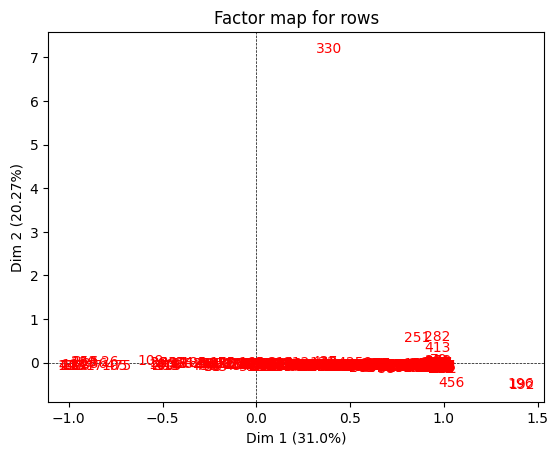

In [14]:
#Carte des points lignes
afc.mapping_row(num_x_axis=1, num_y_axis=2)

In [15]:
# Créer une série avec les moyennes et les médianes de chaque colonne
moyennes = ligA_preprocessed.mean()
mediane = ligA_preprocessed.median()

# Convertir en DataFrame avec 2 enregistrements
ligne_moyennes = pd.DataFrame([moyennes,mediane], index=['Moyenne','Médiane'])

# Sélectionner les lignes avec les index 456 et 192
lignes_specifiques = ligA_preprocessed.loc[[330,456, 192,109,196]]

# Concaténer le tout
resultat = pd.concat([ligne_moyennes, lignes_specifiques])

colonnes_a_garder = []
for col in ligA_preprocessed.select_dtypes(include='number').columns:
    moyenne_col = moyennes[col]
    val_456 = ligA_preprocessed.loc[456, col] if 456 in ligA_preprocessed.index else 0
    val_192 = ligA_preprocessed.loc[192, col] if 192 in ligA_preprocessed.index else 0
    val_109 = ligA_preprocessed.loc[109, col] if 192 in ligA_preprocessed.index else 0
    val_330 = ligA_preprocessed.loc[330, col] if 330 in ligA_preprocessed.index else 0
    val_196 = ligA_preprocessed.loc[196, col] if 330 in ligA_preprocessed.index else 0

    if val_456 >= 100 * moyenne_col or val_192 >= 10 * moyenne_col or val_109 >= 10 * moyenne_col or val_330 >= 10 * moyenne_col or val_196 >= 10 * moyenne_col :
        colonnes_a_garder.append(col)

# Filtrer le résultat pour ne garder que ces colonnes
resultat_filtre = resultat[colonnes_a_garder]

print(resultat_filtre)

         II    beta-HCG(mIU/mL)  FSH(mIU/mL)   LH(mIU/mL)  Vit D3 (ng/mL)
Moyenne              238.232993    14.601832     6.469919       49.915874
Médiane                1.990000     4.850000     2.300000       25.900000
330                  900.600000  5052.000000     3.680000       28.600000
456                    1.990000     4.330000  2018.000000       41.040000
192                    3.990000     3.630000     1.020000     6014.660000
109                 3893.060000     4.620000     6.030000       15.300000
196                    1.990000    22.000000     3.390000     5418.600000


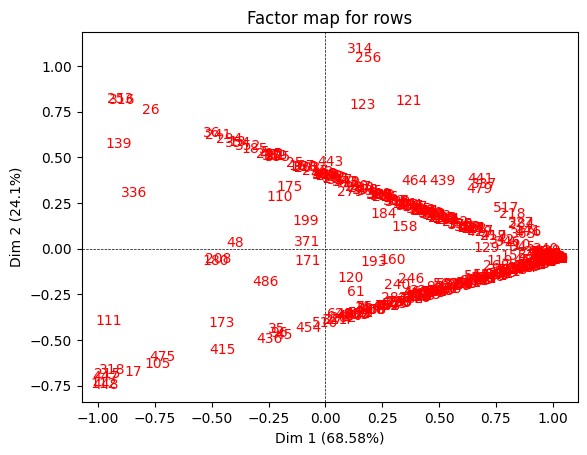

In [16]:
# Suppression des valeurs hors norme

ligA_preprocessed = ligA_preprocessed.drop(index=330)
ligA_preprocessed = ligA_preprocessed.drop(index=456)
ligA_preprocessed = ligA_preprocessed.drop(index=192)
ligA_preprocessed = ligA_preprocessed.drop(index=109)
ligA_preprocessed = ligA_preprocessed.drop(index=196)
afc = CA(row_labels=ligA_preprocessed.index,col_labels=ligA_preprocessed.columns, stats=True)
afc.fit(ligA_preprocessed.values)
afc.mapping_row(num_x_axis=1, num_y_axis=2)

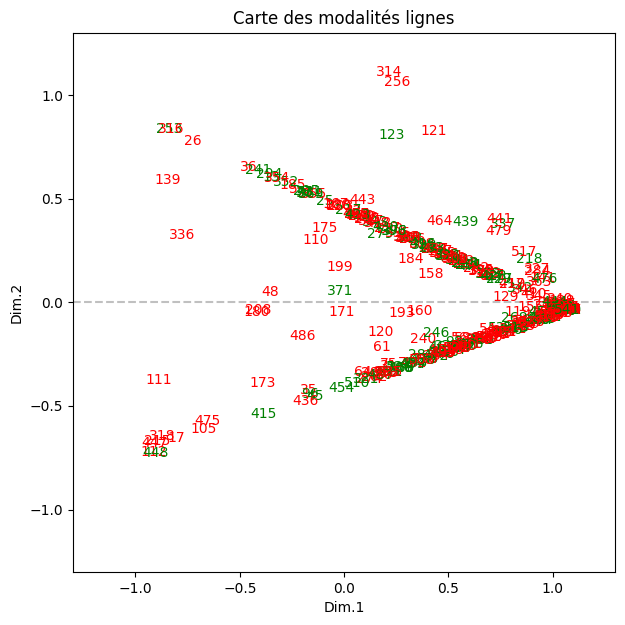

In [17]:
# coordonées des points-lignes dans le premier plan
coord_lig = afc.row_coord_[:,:2]

#Pour mieux visualiser les dispersions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
ax.axis([-1.3,+1.3,-1.3,+1.3])
ax.plot([-1.3,+1.3],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[1.3,+1.3],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités lignes")
for i in range(ligA_preprocessed.shape[0]):
    color = 'green' if ligA_preprocessed['PCOS (Y/N)'].iloc[i] == 1 else 'red'
    ax.text(coord_lig[i,0],coord_lig[i,1],ligA_preprocessed.index[i],  color=color)

plt.show()

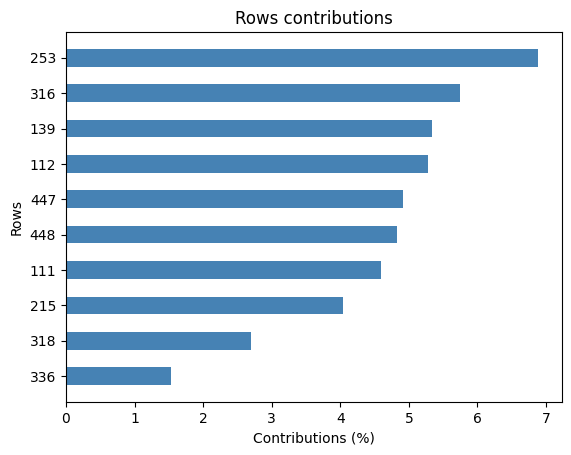

In [18]:
#Contribution 1er facteur
afc.plot_row_contrib(num_axis=1,nb_values=10)
#help(CA.plot_row_contrib)

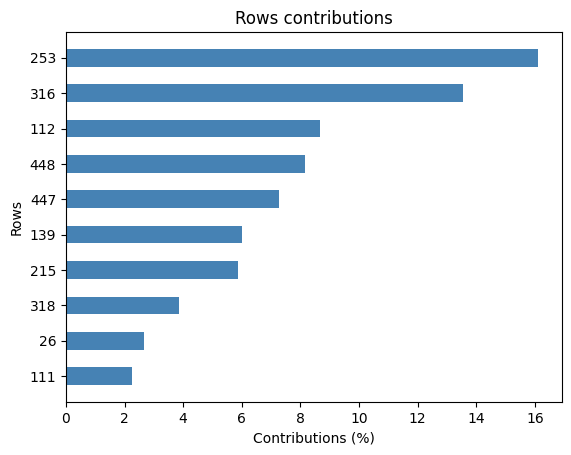

In [19]:
#contribution au 2ème facteur
afc.plot_row_contrib(num_axis=2,nb_values=10)

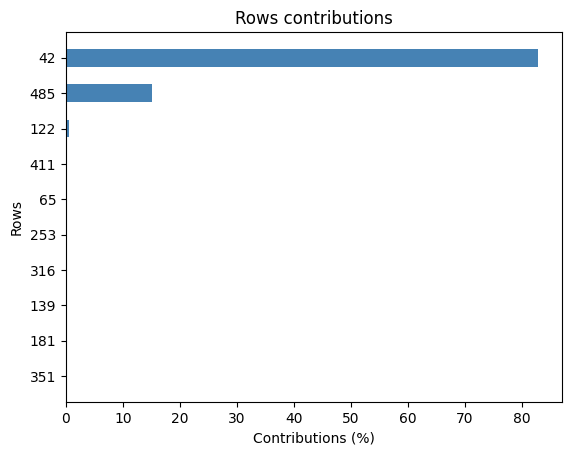

In [20]:
#contribution 3eme facteur
afc.plot_row_contrib(num_axis=3,nb_values=10)

# Analyser les modalités colonnes

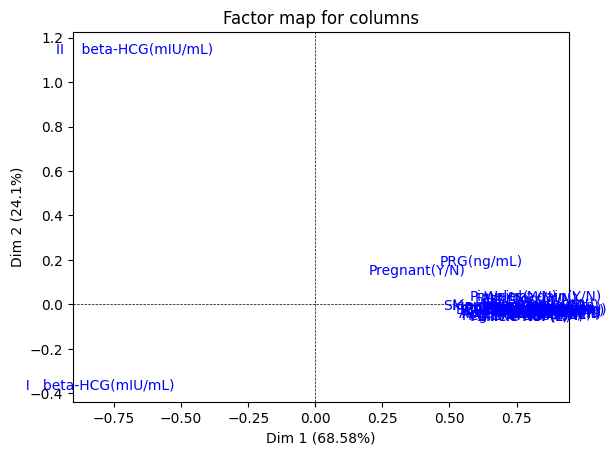

In [21]:
#Mapping du plan
afc.mapping_col(num_x_axis=1, num_y_axis=2)

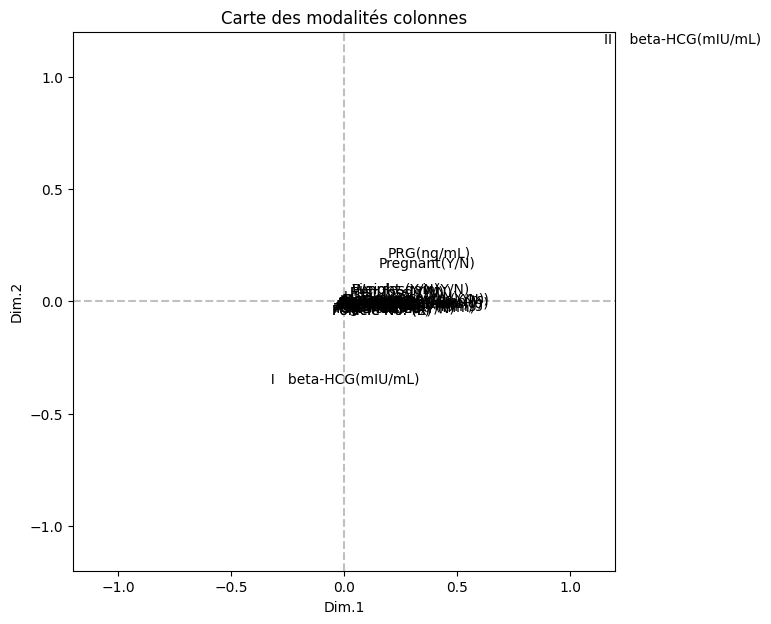

In [22]:
#Coordonnées des points-colonnes dans le premier plan
coord_col = afc.col_coord_[:,:2]

#Pour mieux rendre compte des dispersions
#Affichage dans le premier plan factoriel
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
ax.axis([-1.2,+1.2,-1.2,+1.2])
ax.plot([-1.2,+1.2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1.2,+1.2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités colonnes")
for i in range(ligA_preprocessed.shape[1]):
    ax.text(coord_col[i,1],coord_col[i,1],ligA_preprocessed.columns[i])

plt.show()

# Association des lignes-colonnes

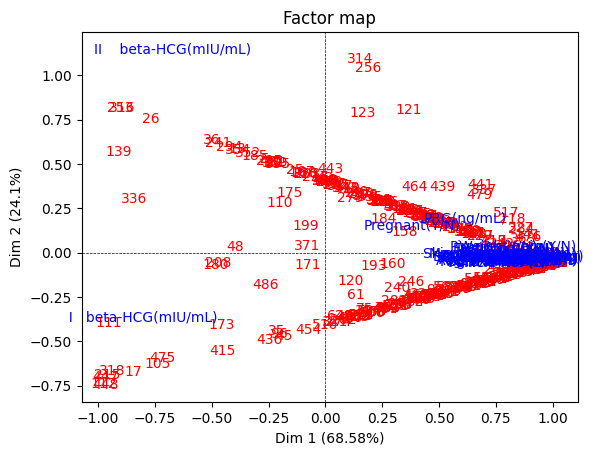

In [23]:
#Représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2)

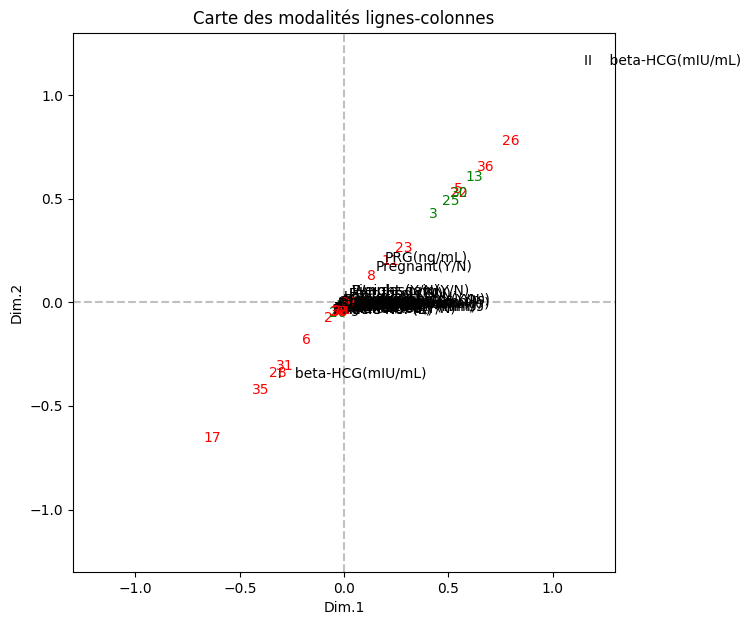

In [24]:
#Pour mieux rendre compte des dispersions
#Affichage dans le premier plan factoriel
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
ax.axis([-1.3,+1.3,-1.3,+1.3])
ax.plot([-1.3,+1.3],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1.3,+1.3],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités lignes-colonnes")
for i in range(ligA_preprocessed.shape[1]):
    color = 'green' if ligA_preprocessed['PCOS (Y/N)'].iloc[i] == 1 else 'red'
    ax.text(coord_lig[i,1],coord_lig[i,1],ligA_preprocessed.index[i],color=color)
    ax.text(coord_col[i,1],coord_col[i,1],ligA_preprocessed.columns[i])

plt.show()

# Décomposition du KHI-2

In [25]:
#KHI-2 du tableau de contingence
from scipy.stats import chi2_contingency
res = chi2_contingency(ligA_preprocessed, correction=False)
res

Chi2ContingencyResult(statistic=np.float64(876352.155802273), pvalue=np.float64(0.0), dof=20330, expected_freq=array([[ 0.15418277, 15.02167975, 28.50393811, ...,  7.16976619,
         7.37793076,  4.05239556],
       [ 0.17385601, 16.93839892, 32.14095113, ...,  8.08460585,
         8.31933156,  4.56946851],
       [ 0.34712979, 33.82007334, 64.17426637, ..., 16.14213741,
        16.61080276,  9.12363446],
       ...,
       [ 0.16345086, 15.92464848, 30.21733936, ...,  7.60074827,
         7.82142582,  4.29598926],
       [ 0.20758834, 20.2248637 , 38.37708385, ...,  9.65321765,
         9.9334859 ,  5.45605746],
       [ 0.17166218, 16.72465957, 31.73537643, ...,  7.98258922,
         8.21435302,  4.51180809]], shape=(536, 39)))

In [26]:
#Info disponible - khi2
res.statistic

np.float64(876352.155802273)

In [27]:
#Décomposition
contribKhi2 = ((ligA_preprocessed.values - res.expected_freq)**2)/res.expected_freq

#Vérification de la somme
np.sum(contribKhi2)

np.float64(876352.155802273)

In [28]:
#En fraction de l'info disponible
frac_contrib = contribKhi2/res.statistic
df_contrib = pd.DataFrame(frac_contrib,index=ligA_preprocessed.index,columns=ligA_preprocessed.columns)
df_contrib

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.759370e-07,1.279499e-05,1.037184e-05,9.103697e-05,0.000012,6.030081e-05,2.035892e-05,5.677938e-06,5.688699e-07,3.377097e-06,3.459969e-06,2.074633e-07,1.576314e-07,0.000359,0.000122,1.348437e-05,4.905121e-06,2.005310e-05,1.352608e-05,4.479745e-07,1.561611e-07,1.105628e-04,8.993464e-07,2.997531e-07,0.000047,2.044124e-07,1.484786e-07,1.657672e-07,2.461084e-07,2.654310e-07,2.661302e-06,1.342409e-07,6.352849e-05,5.807046e-05,2.813909e-09,9.278255e-09,1.866775e-05,1.745039e-05,5.570085e-06
2,1.983860e-07,2.447754e-05,3.833298e-05,8.065172e-05,0.000009,3.449548e-05,1.021688e-05,6.146568e-06,3.231902e-07,2.351562e-06,1.301428e-05,3.517803e-06,1.777447e-07,0.000283,0.000138,6.149206e-06,1.148621e-07,1.716187e-05,1.188837e-05,1.698436e-06,8.357848e-07,4.262014e-06,1.533795e-04,1.415851e-06,0.000031,2.304947e-07,1.674240e-07,1.869186e-07,2.775111e-07,2.992991e-07,3.147801e-07,1.513697e-07,6.265022e-05,2.245610e-05,2.862995e-08,6.607279e-07,6.749885e-06,4.426208e-06,1.887832e-07
3,1.401145e-06,2.269092e-08,3.804711e-07,7.524473e-08,0.000001,6.677952e-07,4.011300e-07,3.811828e-09,2.317629e-07,2.055840e-08,4.216497e-07,9.725947e-07,3.548941e-07,0.000080,0.000275,2.203150e-09,1.653082e-06,2.013283e-08,4.586643e-09,1.626918e-07,6.988799e-08,1.065871e-05,1.274034e-05,1.548081e-07,0.000006,4.602176e-07,3.342874e-07,3.732113e-07,6.218637e-07,4.942971e-07,4.180487e-07,3.022324e-07,1.023181e-07,1.039347e-07,7.202997e-06,9.970636e-06,2.439987e-07,7.890861e-07,9.605590e-08
4,1.801898e-07,3.465364e-05,5.011650e-05,7.602356e-05,0.000007,4.162394e-05,1.357845e-05,8.943661e-06,5.142293e-07,3.156629e-06,1.830500e-08,2.124781e-07,1.614417e-07,0.000368,0.000125,1.340618e-05,8.858520e-07,3.367554e-05,2.608160e-05,1.741776e-04,9.619208e-07,5.998128e-05,2.995907e-05,1.380237e-08,0.000017,2.093535e-07,1.520677e-07,1.697742e-07,2.520574e-07,2.718470e-07,2.859081e-07,1.374859e-07,8.305047e-05,3.174337e-05,3.713215e-07,5.391921e-07,9.110706e-06,6.270298e-06,3.084857e-06
5,5.085610e-07,8.917943e-06,1.279322e-05,1.604165e-05,0.000004,9.590799e-06,3.156228e-06,2.165308e-06,7.542204e-07,5.524037e-07,9.917432e-06,4.887816e-07,4.556471e-07,0.000018,0.000829,1.680439e-06,2.506146e-06,5.190764e-06,6.822080e-06,8.683300e-08,4.419460e-06,4.120546e-07,4.360636e-07,2.929899e-07,0.000024,5.908714e-07,4.291902e-07,4.791644e-07,2.595441e-07,7.672509e-07,8.069363e-07,3.880350e-07,1.059191e-05,7.393588e-06,3.987792e-06,3.293885e-06,1.229141e-06,2.872095e-06,2.164538e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1.673631e-07,3.425121e-05,2.204048e-05,1.401654e-04,0.000021,5.136142e-05,6.868005e-06,7.913123e-06,6.926713e-07,3.865688e-06,6.663465e-06,1.973530e-07,6.551313e-06,0.000342,0.000116,2.818576e-05,2.930190e-07,7.626858e-06,8.384255e-06,5.219695e-08,3.199481e-07,3.412660e-06,4.787800e-05,3.315414e-09,0.000055,1.944508e-07,1.412428e-07,1.576889e-07,2.341149e-07,2.524958e-07,2.655559e-07,1.276990e-07,7.339548e-05,4.007033e-05,1.293712e-06,3.430460e-06,1.908213e-05,1.445399e-06,2.396066e-06
538,1.953995e-07,1.212894e-05,3.586358e-05,7.721999e-05,0.000009,3.222946e-05,6.782231e-06,4.591094e-06,3.502651e-07,2.469856e-06,1.432941e-09,3.599355e-06,5.330496e-06,0.000242,0.000136,2.140941e-06,1.510292e-06,1.086134e-05,1.255546e-05,1.5407

<Axes: ylabel='Sl. No'>

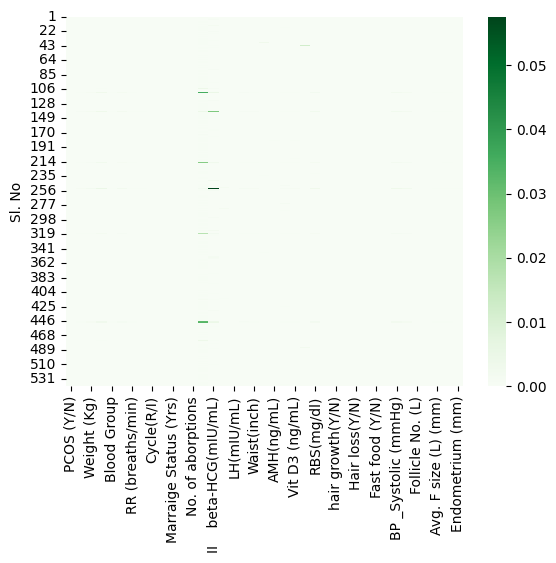

In [29]:
#En heatmap
import seaborn as sns
sns.heatmap(df_contrib, vmin=0,vmax=np.max(frac_contrib),cmap="Greens")

# Résidus standardisés

In [30]:
#résidus standaridisés
res_std = (ligA_preprocessed.values-res.expected_freq)/np.sqrt(res.expected_freq)
df_res_std = pd.DataFrame(res_std,index=ligA_preprocessed.index,columns=ligA_preprocessed.columns)
df_res_std

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.392661,3.348569,3.014860,8.931990,3.276228,7.269439,4.223930,2.230667,0.706067,1.720327,1.741307,-0.426393,-0.371673,-17.749463,-10.326750,3.437594,2.073310,4.192085,3.442907,-0.626565,-0.369935,9.843372,0.887775,0.512532,6.424505,-0.423246,-0.360721,-0.381144,-0.464411,-0.482298,1.527167,-0.342990,7.461456,7.133735,0.049659,-0.090172,4.044691,3.910586,2.209379
2,-0.416960,4.631516,5.795963,8.407099,2.776839,5.498198,2.992254,2.320896,0.532192,1.435547,3.377142,1.755800,-0.394673,-15.760469,-10.988546,2.321394,-0.317269,3.878123,3.227754,1.220011,-0.855828,1.932621,11.593726,1.113905,5.220631,-0.449438,-0.383044,-0.404730,-0.493151,-0.512144,-0.525222,-0.364216,7.409700,4.436153,-0.158398,0.760940,2.432134,1.969497,-0.406744
3,1.108105,-0.141015,0.577431,-0.256790,-0.995975,-0.764999,-0.592901,-0.057797,-0.450673,-0.134225,0.607876,0.923220,-0.557685,-8.363769,15.533662,-0.043940,-1.203612,-0.132829,-0.063400,-0.377592,0.247480,-3.056270,3.341410,-0.368329,-2.247931,-0.635069,-0.541252,-0.571896,0.738222,0.658163,0.605275,-0.514647,-0.299444,-0.301800,2.512441,2.955975,0.462416,0.831575,0.290136
4,-0.397379,5.510789,6.627194,8.162316,2.406165,6.039638,3.449566,2.799607,0.671302,1.663225,0.126656,-0.431516,-0.376138,-17.965365,-10.455335,3.427614,0.881089,5.432461,4.780865,12.354795,-0.918140,7.250153,5.123934,0.109981,3.893044,-0.428331,-0.365055,-0.385723,-0.469990,-0.488092,-0.500556,-0.347111,8.531205,5.274313,-0.570446,-0.687402,2.825630,2.344139,1.644208
5,-0.667592,-2.795578,-3.348338,-3.749418,-1.844055,-2.899124,-1.663120,-1.377524,-0.812996,-0.695773,-2.948078,0.654481,-0.631908,-3.974062,26.947377,-1.213530,-1.481981,-2.132824,-2.445106,-0.275856,-1.967995,-0.600920,0.618179,-0.506717,-4.579032,-0.719591,-0.613288,-0.648010,0.476919,-0.819989,-0.840928,-0.583143,-3.046677,-2.545464,-1.869414,-1.699001,-1.037863,-1.586495,-1.377279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,-0.382974,5.478697,4.394909,11.083062,4.286175,6.709001,2.453322,2.633379,0.779117,1.840572,2.416514,-0.415873,2.396092,-17.306004,-10.062527,4.969975,0.506742,2.585307,2.710638,-0.213876,-0.529516,-1.729362,6.477499,-0.053902,6.931924,-0.412804,-0.351822,-0.371741,-0.452954,-0.470399,-0.482411,-0.334528,8.019993,5.925852,-1.064776,-1.733866,4.089335,1.125468,1.449068
538,-0.413810,3.260249,5.606168,8.226294,2.839329,5.314542,2.437955,2.005845,0.554036,1.471212,-0.035437,1.776036,2.161340,-14.565820,-10.902817,1.369751,1.150455,3.085183,3.317078,0.367458,1.525269,2.280663,1.959392,-0.131694,7.570937,1.795898,-0.380149,-0.401672,-0.489424,-0.508274,-0.521254,-0.361464,6.303234,4.567576,3.202416,1.862905,3.911285,3.425606,1.743745
539,-0.404291,5.030698,4.326456,8.170245,2.275425,6.058248,3.284758,2.166335,0.621269,2.213651,2.086696,-0.439021,-0.382681,-18.281652,-10.643645,5.706006,1.182714,2.454734,2.625970,1.100981,0.513153,23.967012,2.057067,-0.108254,5.836693,-0.435781,-0.371404,-0.392432,-0.478165,-0.496582,-0.509263,-0.353149,6.814735,6.574599,-1.189129,-1.830374,3.772019,0.421419,1.449339


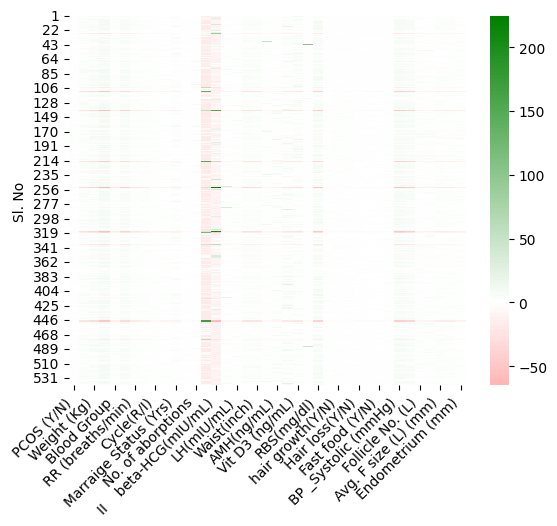

In [31]:
#Sous forme de tableau
from matplotlib.colors import LinearSegmentedColormap
custom_plot = sns.heatmap(df_res_std,center=0.0,cmap=LinearSegmentedColormap.from_list(name='test',colors=['red','white','green']))
custom_plot.set_xticklabels(custom_plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
#On sauvegarde le heatmap au format png
plt.savefig('heatmap.png')

Début du modèle de Machine Learning

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Standardisation des valeurs On tests les 2 manières de standardisé les plus courantes pour voir laquelle donne de meilleurs resultats

Y = ligA_preprocessed['PCOS (Y/N)']
X = ligA_preprocessed.drop('PCOS (Y/N)', axis=1)

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_means = scaler.fit_transform(X)
X_min_max = min_max_scaler.fit_transform(X)



On commence par tester une regression linéaire. On regarde aussi si le scaler utilisé à un impact

In [33]:
from sklearn.model_selection import train_test_split

x_train_means, x_test_means, y_train_means, y_test_means = train_test_split(X_means, Y, test_size=0.33, random_state=42)
x_train_min_max, x_test_min_max, y_train_min_max, y_test_min_max = train_test_split(X_min_max, Y, test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg_means = LogisticRegression(penalty=None)
log_reg_means.fit(x_train_means, y_train_means)


log_reg_min_max = LogisticRegression(penalty=None)
log_reg_min_max.fit(x_train_min_max, y_train_min_max)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
y_pred_train_means = log_reg_means.predict(x_train_means)
y_pred_test_means = log_reg_means.predict(x_test_means)

In [36]:
from sklearn.metrics import accuracy_score

print('Accuracy sur le jeu d\'entraînement : '+ str(accuracy_score(y_train_means,y_pred_train_means)))
print('Accuracy sur le jeu de test : '+ str(accuracy_score(y_test_means,y_pred_test_means)))

Accuracy sur le jeu d'entraînement : 0.9693593314763231
Accuracy sur le jeu de test : 0.7909604519774012


In [37]:
y_pred_train_min_max = log_reg_min_max.predict(x_train_min_max)
y_pred_test_min_max = log_reg_min_max.predict(x_test_min_max)

In [38]:
print('Accuracy sur le jeu d\'entraînement : '+ str(accuracy_score(y_train_min_max,y_pred_train_min_max )))
print('Accuracy sur le jeu de test : '+ str(accuracy_score(y_test_min_max,y_pred_test_min_max)))

Accuracy sur le jeu d'entraînement : 0.9721448467966574
Accuracy sur le jeu de test : 0.7909604519774012


On retrouve exactement la même accuracy pour les 2 méthodes de scaling, on testera uniquement avec la moyenne pour la suite

On test les score avec un arbre de décision

In [39]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(x_train_means,y_train_means)
Y_pred_train = clf.predict(x_train_means)
Y_pred_test = clf.predict(x_test_means)

print('Accuracy sur le jeu d\'entraînement : '+ str(accuracy_score(Y_pred_train, y_train_means)))
print('Accuracy sur le jeu de test : '+ str(accuracy_score(y_test_means,Y_pred_test)))

Accuracy sur le jeu d'entraînement : 1.0
Accuracy sur le jeu de test : 0.847457627118644


[Text(0.5703125, 0.9375, 'x[34] <= 0.425\nentropy = 0.899\nsamples = 359\nvalue = [246.0, 113.0]'),
 Text(0.290625, 0.8125, 'x[24] <= 0.258\nentropy = 0.498\nsamples = 247\nvalue = [220, 27]'),
 Text(0.43046875, 0.875, 'True  '),
 Text(0.125, 0.6875, 'x[8] <= -0.968\nentropy = 0.191\nsamples = 170\nvalue = [165, 5]'),
 Text(0.05, 0.5625, 'x[34] <= -0.252\nentropy = 0.787\nsamples = 17\nvalue = [13, 4]'),
 Text(0.025, 0.4375, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.075, 0.4375, 'x[2] <= -0.334\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.05, 0.3125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1, 0.3125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2, 0.5625, 'x[9] <= -1.026\nentropy = 0.057\nsamples = 153\nvalue = [152, 1]'),
 Text(0.175, 0.4375, 'x[2] <= 1.158\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(0.15, 0.3125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.2, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0,

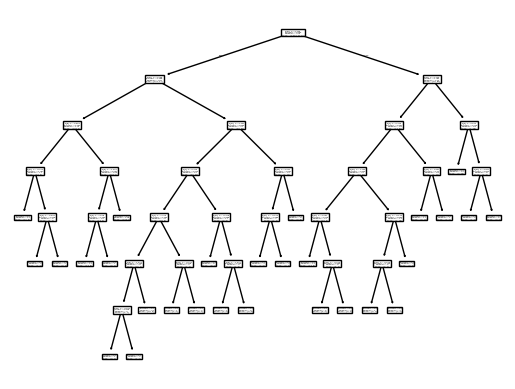

In [40]:
tree.plot_tree(clf)

In [41]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train_means, y_train_means)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [42]:
Y_pred_train_svm = svm.predict(x_train_means)
Y_pred_test_svm = svm.predict(x_test_means)

print('Accuracy sur le jeu d\'entraînement : '+ str(accuracy_score(Y_pred_train_svm, y_train_means)))
print('Accuracy sur le jeu de test : '+ str(accuracy_score(Y_pred_test_svm,y_test_means)))

Accuracy sur le jeu d'entraînement : 0.9832869080779945
Accuracy sur le jeu de test : 0.8361581920903954


Le tableau ayant un nombre très important de feature, on essaye de déterminer lequelles pourraient être retirées pour avoir des resultats plus précis. On utilise une classification  par N-Voisins pour déterminés quels sont les fetures proches et ne garder que les plus significatives

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)

# Sélection forward : ajoute progressivement les meilleures features
sfs = SequentialFeatureSelector(knn, n_features_to_select=20, direction='forward', cv=5)
sfs.fit(X_means, Y)

# Features sélectionnées
features_selectionnees = X.columns[sfs.get_support()].tolist()
features_redondantes = X.columns[~sfs.get_support()].tolist()

print("Features sélectionnées :", features_selectionnees)
print("Features redondantes :", features_redondantes)

Features sélectionnées : [' Age (yrs)', 'Pulse rate(bpm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'TSH (mIU/L)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
Features redondantes : ['Weight (Kg)', 'Height(Cm) ', 'Blood Group', 'RR (breaths/min)', 'Cycle length(days)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)']


In [44]:
ligA_reduced= ligA_preprocessed[features_selectionnees]
ligA_reduced

,Age (yrs),Pulse rate(bpm),Hb(g/dl),Cycle(R/I),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),TSH (mIU/L),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,
1,28,78,10.48,2,7.0,0,0,1.99,1.99,0.68,0.57,92.0,0,0,1.0,3,3,18.0,18.0,8.5
2,36,74,11.70,2,11.0,1,0,60.80,1.99,3.16,0.97,92.0,0,0,0.0,3,5,15.0,14.0,3.7
3,33,72,11.80,2,10.0,1,0,494.08,494.08,2.54,0.36,84.0,0,0,1.0,13,15,18.0,20.0,10.0
4,37,72,12.00,2,4.0,0,0,1.99,1.99,16.41,0.36,76.0,0,0,0.0,2,2,15.0,14.0,7.5
5,25,72,10.00,2,1.0,1,0,801.45,801.45,3.57,0.38,84.0,0,0,0.0,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,35,72,11.00,2,8.0,0,1,1.99,1.99,1.11,0.25,92.0,0,0,0.0,1,0,17.5,10.0,6.7
538,30,72,10.80,2,4.0,1,1,80.13,1.99,2.05,0.25,108.0,1,0,0.0,9,7,19.0,18.0,8.2
539,36,74,10.80,2,8.0,0,0,1.99,1.99,2.87,0.25,92.0,0,0,0.0,1,0,18.0,9.0,7.3


On essaie de voir les resultat en utilisant une liste reduite de features

In [45]:

x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(ligA_reduced, Y, test_size=0.33, random_state=42)

x_train_red_mean = scaler.fit_transform(x_train_red)
x_test_red_mean = scaler.fit_transform(x_test_red)

In [46]:


svm_red = SVC()
svm_red.fit(x_train_red_mean, y_train_means)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [47]:
Y_pred_train_red = svm_red.predict(x_train_red_mean)
Y_pred_test_red = svm_red.predict(x_test_red_mean)

print('Accuracy sur le jeu d\'entraînement : '+ str(accuracy_score(Y_pred_train_red, y_train_means)))
print('Accuracy sur le jeu de test : '+ str(accuracy_score(Y_pred_test_red,y_test_means)))

Accuracy sur le jeu d'entraînement : 0.9721448467966574
Accuracy sur le jeu de test : 0.8418079096045198


On essaie de modifier les hyperparamètres pour trouver les meilleurs

In [ ]:
from sklearn.model_selection import GridSearchCV


#  Définir la grille de paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear', 'poly']
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner sur toutes les combinaisons
grid_search.fit(ligA_reduced, Y)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)


In [ ]:
svm_red_hyper = grid_search.best_estimator_
svm_red_hyper.fit(x_train_red_mean, y_train_means)

Y_pred_train_red_hyper = svm_red_hyper.predict(x_train_red_mean)
Y_pred_test_red_hyper = svm_red_hyper.predict(x_test_red_mean)

print('Accuracy sur le jeu d\'entraînement : '+ str(accuracy_score(Y_pred_train_red_hyper, y_train_means)))
print('Accuracy sur le jeu de test : '+ str(accuracy_score(Y_pred_test_red_hyper,y_test_means)))

Accuracy sur le jeu d'entraînement : 0.9888579387186629
Accuracy sur le jeu de test : 0.8418079096045198
